In [1]:
import pandas as pd
import numpy as np
import os
import env

import reg_wrangle as rw


from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score


from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
train, validate, test, train_scaled, validate_scaled, test_scaled = rw.wrangle_zillow()

In [3]:
train.head()

,bed_rooms,bath_rooms,finished_sqft,tax_val_dollar_count,year_built,tax_amt,fips
666455,3,3.0,1620,241434,1989,2251.46,6059
1783637,3,1.0,1557,280212,1948,4274.29,6037
1250454,3,2.0,1512,335993,1965,4238.40,6037
800277,2,4.0,1932,63740,1939,973.80,6037
1382185,3,2.0,1411,282027,1965,3548.28,6037


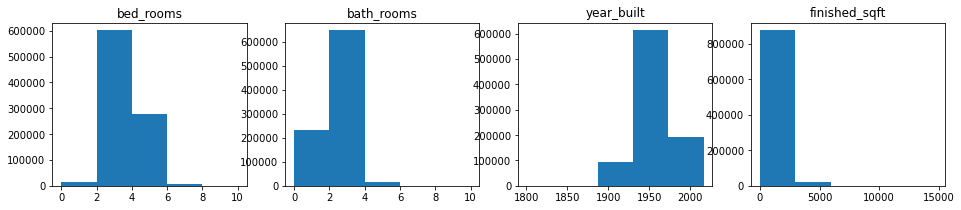

In [5]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bed_rooms', 'bath_rooms', 'year_built', 'finished_sqft']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train[col].hist(bins=5)
    # Hide gridlines.
    plt.grid(False)

In [6]:
# create the correlation matrix using pandas .corr()
zillow_corr = train.drop(columns='tax_val_dollar_count').corr(method='spearman')
zillow_corr

,bed_rooms,bath_rooms,finished_sqft,year_built,tax_amt,fips
bed_rooms,1.000000,0.602330,0.630692,0.412403,0.175233,0.170399
bath_rooms,0.602330,1.000000,0.769498,0.560642,0.271165,0.181538
finished_sqft,0.630692,0.769498,1.000000,0.468071,0.274583,0.164153
year_built,0.412403,0.560642,0.468071,1.000000,0.195879,0.375659
tax_amt,0.175233,0.271165,0.274583,0.195879,1.000000,0.033875
fips,0.170399,0.181538,0.164153,0.375659,0.033875,1.000000


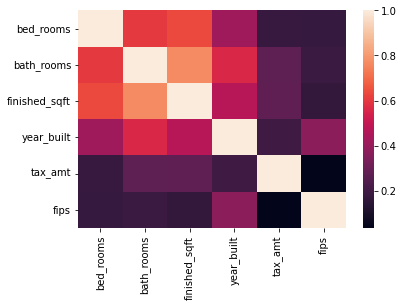

In [7]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(zillow_corr)
plt.show()

In [8]:
np.triu(zillow_corr)

array([[1.        , 0.60232983, 0.63069175, 0.41240297, 0.17523288,
        0.17039929],
       [0.        , 1.        , 0.76949806, 0.56064166, 0.27116462,
        0.18153822],
       [0.        , 0.        , 1.        , 0.46807097, 0.274583  ,
        0.16415251],
       [0.        , 0.        , 0.        , 1.        , 0.19587859,
        0.37565945],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.03387519],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

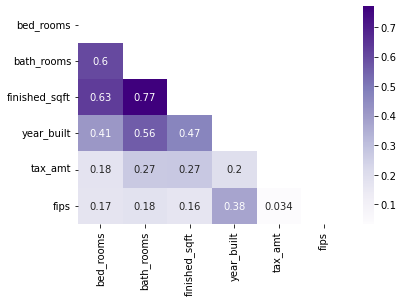

In [9]:
# pass my correlation matrix to Seaborn's heatmap with customization
sns.heatmap(zillow_corr, cmap='Purples', annot=True, 
            mask=np.triu(zillow_corr))
plt.show()

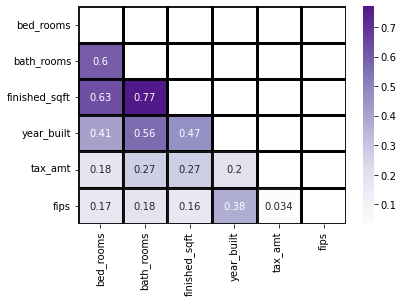

In [11]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(zillow_corr, cmap='Purples', annot=True, 
            mask=np.triu(zillow_corr), **kwargs)
plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
X = train[['bed_rooms', 'bath_rooms', 'year_built', 'finished_sqft']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,bed_rooms,25.265489
1,bath_rooms,21.236137
2,year_built,15.363372
3,finished_sqft,21.868339


In [15]:
#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [19]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p_value = spearmanr(train.bed_rooms, train.bath_rooms)

In [20]:
print(f'Correlation Coefficient by Spearman Test: {r}\np-value: {p_value}')

Correlation Coefficient by Spearman Test: 0.6023298256896106
p-value: 0.0


In [21]:
# set alpha : 0.05
if p_value < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

We can reject the null hypothesis


KeyboardInterrupt: 

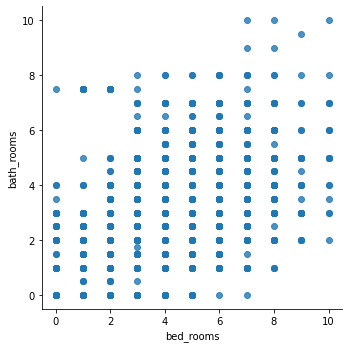

In [22]:
# I can really pop that line color if I want
sns.lmplot(data=train, x='bed_rooms', y='bath_rooms',
           line_kws={'color':'red'})
plt.show()

KeyboardInterrupt: 

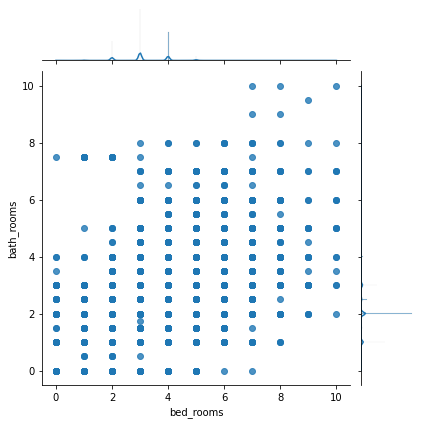

In [23]:
sns.jointplot(data=train, x='bed_rooms', y='bath_rooms',
             kind='reg')
plt.show()